In [1]:
from gcell.rna.gencode import Gencode

gencode = Gencode(assembly="mm10", version="M23")


In [2]:
import os
import subprocess

import numpy as np
import pandas as pd
import zarr
from gcell.rna.gencode import Gencode
from pyranges import PyRanges as pr

In [3]:
gene_exp = pd.read_csv("/gpfs/home/asun/jin_lab/get/2_aggr_preprocessing/l6_it.rna.csv")

In [4]:
gene_exp

,gene_name,TPM
0,0610005C13Rik,0.244238
1,0610006L08Rik,0.000000
2,0610009B22Rik,1.158315
3,0610009E02Rik,0.604157
4,0610009L18Rik,0.538226
...,...,...
32280,mt-Nd3,2.229941
32281,mt-Nd4,2.626682
32282,mt-Nd4l,1.782705
32283,mt-Nd5,2.340739


In [5]:
unique_genes = gene_exp["gene_name"].unique()
len(unique_genes)

32245

In [6]:
promoter_exp = pd.merge(
            gencode.gtf, gene_exp, left_on="gene_name", right_on="gene_name"
        )

In [7]:
# Genes in gene_exp not in gencode.gtf
left_out_genes = gene_exp.loc[~gene_exp['gene_name'].isin(gencode.gtf['gene_name']), 'gene_name'].unique()

print("Genes left out during merge:", left_out_genes)
print("Number of genes left out:", len(left_out_genes))


Genes left out during merge: ['1700040F15Rik' '4933409K07Rik' 'AC087559.2' 'AC087559.3' 'AC102264.1'
 'AC123873.1' 'AC123873.2' 'AC123873.3' 'AC124606.1' 'AC124606.2'
 'AC125149.1' 'AC125149.2' 'AC125149.3' 'AC125149.4' 'AC125149.5'
 'AC125178.1' 'AC125178.2' 'AC125178.3' 'AC126035.1' 'AC132444.1'
 'AC132444.2' 'AC132444.3' 'AC132444.4' 'AC132444.5' 'AC132444.6'
 'AC133095.1' 'AC133095.2' 'AC133103.1' 'AC133103.3' 'AC133103.4'
 'AC133103.5' 'AC133103.6' 'AC133103.7' 'AC140325.1' 'AC140325.2'
 'AC140325.3' 'AC140325.4' 'AC140365.1' 'AC149090.1' 'AC163611.1'
 'AC163611.2' 'AC164084.1' 'AC164084.2' 'AC164084.3' 'AC165294.1'
 'AC165294.2' 'AC165294.3' 'AC168977.1' 'AC168977.2' 'AC234645.1'
 'CAAA01118383.1' 'CAAA01147332.1' 'CAAA01165726.1' 'CR974586.1'
 'CR974586.2' 'CR974586.3' 'CR974586.4' 'CR974586.5' 'CT868723.1' 'Ccl21c'
 'Csprs' 'Ddx3y' 'Eif2s3y' 'Gm10256' 'Gm10352' 'Gm10931' 'Gm16367'
 'Gm20736' 'Gm20737' 'Gm20738' 'Gm20747' 'Gm20772' 'Gm20773' 'Gm20777'
 'Gm20792' 'Gm20795' 'Gm208

In [8]:
promoter_exp

,index,Chromosome,Start,End,Strand,gene_name,gene_id,gene_type,transcript_id,chrom_count,TPM
0,10,chr1,3466586,3466586,+,Gm1992,ENSMUSG00000089699,lncRNA,ENSMUST00000161581.1,1,1.488779
1,23,chr1,4497473,4497473,+,Gm37587,ENSMUSG00000104238,lncRNA,ENSMUST00000194935.1,1,0.000000
2,41,chr1,4807822,4807822,+,Lypla1,ENSMUSG00000025903,protein_coding,ENSMUST00000027036.10,1,1.411879
3,64,chr1,4807829,4807829,+,Lypla1,ENSMUSG00000025903,protein_coding,ENSMUST00000150971.7,1,1.411879
4,85,chr1,4807895,4807895,+,Lypla1,ENSMUSG00000025903,protein_coding,ENSMUST00000119612.8,1,1.411879
...,...,...,...,...,...,...,...,...,...,...,...
57104,1289123,chrX,169779635,169779635,-,4933400A11Rik,ENSMUSG00000055357,protein_coding,ENSMUST00000068874.7,1,0.000000
57105,1289134,chrX,169779557,169779557,-,4933400A11Rik,ENSMUSG00000055357,protein_coding,ENSMUST00000112102.1,1,0.000000
57106,1289146,chrX,169978917,169978917,-,G530011O06Rik,ENSMUSG00000072844,lncRNA,ENSMUST00000154810.1,1,0.266983
57107,1289150,chrX,169985232,169985232,-,Gm15726,ENSMUSG00000087263,lncRNA,ENSMUST00000144738.1,1,0.652356


In [9]:
unique_genes = promoter_exp["gene_name"].unique()
len(unique_genes)

31440

In [10]:
atac = pr(
            pd.read_csv(
                "/gpfs/home/asun/jin_lab/get/2_aggr_preprocessing/l6_it.atac.bed",
                sep="\t",
                header=None,
                names=["Chromosome", "Start", "End", "aTPM"],
            ).reset_index(),
            int64=True,
        )
atac

,index,Chromosome,Start,End,aTPM
0,0,chr1,3094753,3095675,0.044651
1,1,chr1,3120133,3120689,0.086326
2,2,chr1,3121252,3122011,0.079318
3,3,chr1,3292425,3293285,0.119320
4,4,chr1,3297205,3298011,0.051502
...,...,...,...,...,...
127970,127970,chrX,170004064,170004736,0.113312
127971,127971,chrX,170004873,170005776,0.159756
127972,127972,chrX,170672396,170673174,0.055511
127973,127973,chrX,170674517,170675289,0.162202


In [11]:
#azimuth marker genes
marker_genes = ['C1ql3', 'Cdh13', 'Il1rapl2', 'Zfp804b', 'Dscaml1', 'Slit3', 'Galnt14', 'Nell2', 'Ak5', 'Cck']

# Check which are present
present_genes = [g for g in marker_genes if g in promoter_exp["gene_name"].values]
missing_genes = [g for g in marker_genes if g not in promoter_exp["gene_name"].values]

print("Present in promoter_exp:", present_genes)
print("Missing from promoter_exp:", missing_genes)

Present in promoter_exp: ['C1ql3', 'Cdh13', 'Il1rapl2', 'Zfp804b', 'Dscaml1', 'Slit3', 'Galnt14', 'Nell2', 'Ak5', 'Cck']
Missing from promoter_exp: []


In [12]:
# Or check expression for specific genes
expr_marker_genes = promoter_exp[promoter_exp["gene_name"].isin(marker_genes)]
expr_marker_genes

,index,Chromosome,Start,End,Strand,gene_name,gene_id,gene_type,transcript_id,chrom_count,TPM
13981,613773,chr8,118283732,118283732,+,Cdh13,ENSMUSG00000031841,protein_coding,ENSMUST00000117160.1,1,2.376096
14811,654504,chr9,45430290,45430290,+,Dscaml1,ENSMUSG00000032087,protein_coding,ENSMUST00000034592.9,1,2.360121
17536,782954,chr11,35121223,35121223,+,Slit3,ENSMUSG00000056427,protein_coding,ENSMUST00000069837.3,1,2.782949
28633,1258640,chrX,137570607,137570607,+,Il1rapl2,ENSMUSG00000059203,protein_coding,ENSMUST00000113063.7,1,2.829411
28634,1258667,chrX,137651719,137651719,+,Il1rapl2,ENSMUSG00000059203,protein_coding,ENSMUST00000075471.3,1,2.829411
30563,135861,chr2,13011806,13011806,-,C1ql3,ENSMUSG00000049630,protein_coding,ENSMUST00000061545.6,1,2.753972
34171,250884,chr3,152668360,152668360,-,Ak5,ENSMUSG00000039058,protein_coding,ENSMUST00000045262.10,1,2.538792
35829,369062,chr5,7344756,7344756,-,Zfp804b,ENSMUSG00000092094,protein_coding,ENSMUST00000200317.4,1,2.843680
35830,369075,chr5,6876523,6876523,-,Zfp804b,ENSMUSG00000092094,protein_coding,ENSMUST00000164784.1,1,2.843680
44282,715018,chr9,121495639,121495639,-,Cck,ENSMUSG00000032532,protein_coding,ENSMUST00000216138.1,1,2.955250


In [ ]:
marker_genes = ['C1ql3','Sema3e','Nell2','Celf4','Grm8','Sdk2','Gm26871','Pcsk2','Cck','Rspo2','Zfp804b','Sorcs3','Dpp10','Rimbp2','Ak5','Bmpr1b','Atp2b4',
                'Sgcz','Slc17a7','Ilrapl2']

In [13]:
exp = atac.join(pr(promoter_exp, int64=True).extend(300), how="left").as_df()
exp

join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


,index,Chromosome,Start,End,aTPM,index_b,Start_b,End_b,Strand,gene_name,gene_id,gene_type,transcript_id,chrom_count,TPM
0,35,chr1,4496388,4497183,0.028774,23,4497173,4497773,+,Gm37587,ENSMUSG00000104238,lncRNA,ENSMUST00000194935.1,1,0.000000
1,43,chr1,4807384,4808286,0.293363,41,4807522,4808122,+,Lypla1,ENSMUSG00000025903,protein_coding,ENSMUST00000027036.10,1,1.411879
2,43,chr1,4807384,4808286,0.293363,64,4807529,4808129,+,Lypla1,ENSMUSG00000025903,protein_coding,ENSMUST00000150971.7,1,1.411879
3,43,chr1,4807384,4808286,0.293363,85,4807595,4808195,+,Lypla1,ENSMUSG00000025903,protein_coding,ENSMUST00000119612.8,1,1.411879
4,43,chr1,4807384,4808286,0.293363,104,4807610,4808210,+,Lypla1,ENSMUSG00000025903,protein_coding,ENSMUST00000115529.7,1,1.411879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144056,127943,chrX,168673441,168674364,0.269964,1288960,168673598,168674198,-,Msl3,ENSMUSG00000031358,protein_coding,ENSMUST00000112137.1,1,1.204187
144057,127948,chrX,169319910,169320812,0.209397,1289072,169319980,169320580,-,Hccs,ENSMUSG00000031352,protein_coding,ENSMUST00000033717.8,1,1.097303
144058,127948,chrX,169319910,169320812,0.209397,1289091,169319994,169320594,-,Hccs,ENSMUSG00000031352,protein_coding,ENSMUST00000112115.1,1,1.097303
144059,127965,chrX,169978782,169979597,0.268974,1289146,169978617,169979217,-,G530011O06Rik,ENSMUSG00000072844,lncRNA,ENSMUST00000154810.1,1,0.266983


In [15]:
unique_exp_genes = exp["gene_name"].unique()
len(unique_exp_genes)

17292

In [17]:
unique_exp_genes = set(unique_exp_genes)
unique_genes = set(unique_genes)

In [24]:
len(unique_exp_genes)

17292

In [23]:
len(unique_genes)

31440

In [25]:
missing_from_exp = unique_genes - unique_exp_genes

In [26]:
missing_from_exp

{'Nlrp4a',
 '4931400O07Rik',
 '4930471E15Rik',
 'Gm28511',
 'Gm43120',
 'Gm20420',
 'Gm7971',
 'Ighv9-1',
 'Igkv1-115',
 'Gm48757',
 'Gm34113',
 'Gm47189',
 'Gm50020',
 'Gm37961',
 '4921523L03Rik',
 'Defb10',
 '9230112E08Rik',
 'Prr27',
 'Olfr1212',
 'Olfr561',
 'Gm3460',
 'Gm5083',
 'Gm48491',
 'Olfr1326-ps1',
 'Gm46123',
 'Ang4',
 'Gm49247',
 'Olfr1463',
 'Gm15404',
 'Fndc3c1',
 '4930524N10Rik',
 'Fam178b',
 'Gm42664',
 'Gm805',
 'Gm7697',
 'Fpr-rs6',
 'Olfr1253',
 'Gm33684',
 'A730065G17Rik',
 'Gm43101',
 'Trem3',
 'Trav20',
 'Cks1brt',
 '4933429O19Rik',
 'Gm15128',
 '1700013H16Rik',
 '4931420L22Rik',
 'Rap2b',
 'Ighv1-41',
 'Vmn1r158',
 'Gm3012',
 'Gm14617',
 'Trav6-2',
 'Gm39128',
 'Gm10229',
 'Igkv5-43',
 'Tmem52',
 'C78334',
 'Gm47515',
 'Olfr59',
 '4930432H08Rik',
 'D730045B01Rik',
 'Gm15643',
 'Gm13966',
 'Gm50097',
 'Il31',
 'Gm34376',
 'Gm50137',
 'Gm32338',
 'Pbp2',
 'Gm49886',
 'Gm15600',
 'Olfr73',
 'Gm16145',
 'Gm47757',
 '4930505M18Rik',
 'Olfr1019',
 'Gm34312',
 'Gm115

In [27]:
import pandas as pd

# Filter to only the genes in missing_from_exp
df_filtered = promoter_exp[promoter_exp['gene_name'].isin(missing_from_exp)]

# Group by gene_name and calculate mean TPM
avg_tpm = df_filtered.groupby('gene_name')['TPM'].mean().reset_index()

# Rename column for clarity
avg_tpm.rename(columns={'TPM': 'mean_TPM'}, inplace=True)

print(avg_tpm)

           gene_name  mean_TPM
0      0610005C13Rik  0.244238
1      0610006L08Rik  0.000000
2      0610012D04Rik  0.000000
3      0610031O16Rik  0.000000
4      0610033M10Rik  0.000000
...              ...       ...
14144        Zscan5b  0.000000
14145           Zxdb  0.858984
14146         Zyg11a  0.000000
14147              a  0.798228
14148        ccdc198  0.328840

[14149 rows x 2 columns]


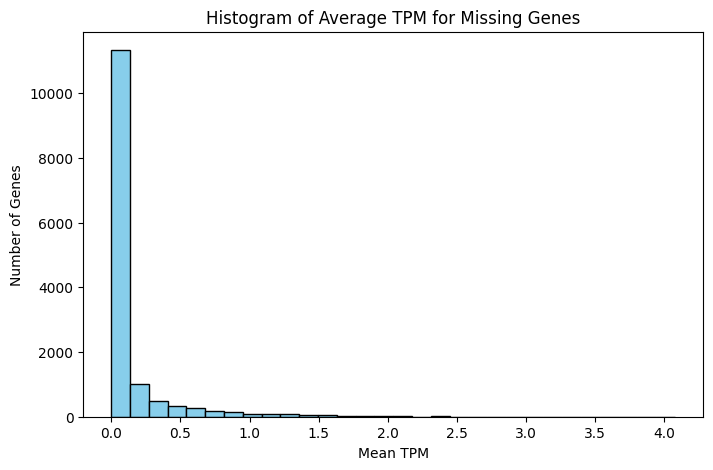

In [28]:
import matplotlib.pyplot as plt

# Histogram of mean TPMs
plt.figure(figsize=(8,5))
plt.hist(avg_tpm['mean_TPM'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Mean TPM')
plt.ylabel('Number of Genes')
plt.title('Histogram of Average TPM for Missing Genes')
plt.show()

In [29]:
import pandas as pd

# Filter to only the genes in missing_from_exp
df_filtered = promoter_exp[promoter_exp['gene_name'].isin(unique_exp_genes)]

# Group by gene_name and calculate mean TPM
avg_tpm = df_filtered.groupby('gene_name')['TPM'].mean().reset_index()

# Rename column for clarity
avg_tpm.rename(columns={'TPM': 'mean_TPM'}, inplace=True)

print(avg_tpm)

           gene_name  mean_TPM
0      0610009B22Rik  1.158315
1      0610009E02Rik  0.604157
2      0610009L18Rik  0.538226
3      0610010F05Rik  1.992882
4      0610010K14Rik  1.161151
...              ...       ...
17286           Zxdc  1.356058
17287         Zyg11b  2.097505
17288            Zyx  0.764334
17289          Zzef1  2.021884
17290           Zzz3  1.963145

[17291 rows x 2 columns]


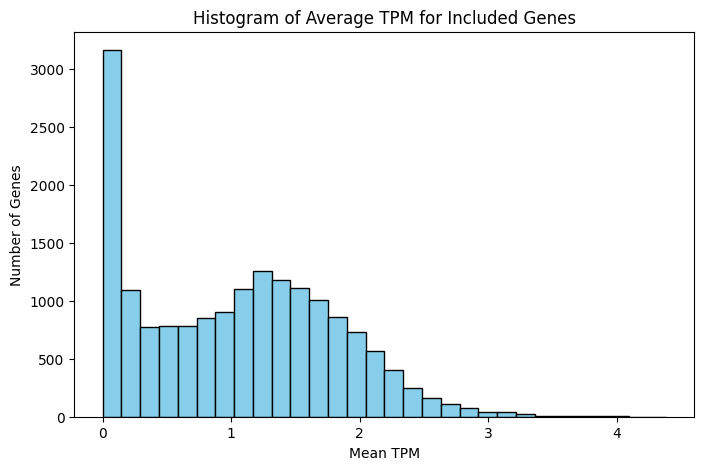

In [31]:
import matplotlib.pyplot as plt

# Histogram of mean TPMs
plt.figure(figsize=(8,5))
plt.hist(avg_tpm['mean_TPM'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Mean TPM')
plt.ylabel('Number of Genes')
plt.title('Histogram of Average TPM for Included Genes')
plt.show()

In [14]:
#azimuth marker genes
marker_genes = ['C1ql3', 'Cdh13', 'Il1rapl2', 'Zfp804b', 'Dscaml1', 'Slit3', 'Galnt14', 'Nell2', 'Ak5', 'Cck']

# Check which are present
present_genes = [g for g in marker_genes if g in exp["gene_name"].values]
missing_genes = [g for g in marker_genes if g not in exp["gene_name"].values]

print("Present in exp:", present_genes)
print("Missing from exp:", missing_genes)

Present in exp: ['C1ql3', 'Cdh13', 'Il1rapl2', 'Zfp804b', 'Dscaml1', 'Slit3', 'Galnt14', 'Nell2', 'Ak5', 'Cck']
Missing from exp: []


In [66]:
neg_tpm = exp[exp["TPM"] < 0]
neg_tpm

,index,Chromosome,Start,End,aTPM,index_b,Start_b,End_b,Strand,gene_name,gene_id,gene_type,transcript_id,chrom_count,TPM
961,0,chr1,3094753,3095675,0.044651,-1,-1,-1,+,-1,-1,-1,-1,-1,-1.0
962,1,chr1,3120133,3120689,0.086326,-1,-1,-1,+,-1,-1,-1,-1,-1,-1.0
963,2,chr1,3121252,3122011,0.079318,-1,-1,-1,+,-1,-1,-1,-1,-1,-1.0
964,3,chr1,3292425,3293285,0.119320,-1,-1,-1,+,-1,-1,-1,-1,-1,-1.0
965,4,chr1,3297205,3298011,0.051502,-1,-1,-1,+,-1,-1,-1,-1,-1,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143541,127969,chrX,169993838,169994668,0.363007,-1,-1,-1,+,-1,-1,-1,-1,-1,-1.0
143542,127970,chrX,170004064,170004736,0.113312,-1,-1,-1,+,-1,-1,-1,-1,-1,-1.0
143543,127971,chrX,170004873,170005776,0.159756,-1,-1,-1,+,-1,-1,-1,-1,-1,-1.0
143544,127973,chrX,170674517,170675289,0.162202,-1,-1,-1,+,-1,-1,-1,-1,-1,-1.0


In [31]:
neg_tpm = exp[(exp["TPM"] < 0) & (exp["gene_name"] != '-1')]
neg_tpm

,index,Chromosome,Start,End,aTPM,index_b,Start_b,End_b,Strand,gene_name,gene_id,gene_type,transcript_id,chrom_count,TPM


In [67]:
gene_idx_info = exp.query('index_b!=-1')[['index', 'gene_name', 'Strand']].values
gene_idx_info

array([[35, 'Gm37587', '+'],
       [43, 'Lypla1', '+'],
       [43, 'Lypla1', '+'],
       ...,
       [127948, 'Hccs', '-'],
       [127965, 'G530011O06Rik', '-'],
       [127968, 'Gm15247', '-']], shape=(32738, 3), dtype=object)

In [68]:
exp = (
        exp[["index", "Strand", "TPM"]]
        .groupby(["index", "Strand"])
        .mean()
        .reset_index()
    )
exp

/tmp/ipykernel_3718/2613265687.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["index", "Strand"])


,index,Strand,TPM
0,0,.,NaN
1,0,-,NaN
2,0,+,-1.0
3,1,.,NaN
4,1,-,NaN
...,...,...,...
383920,127973,-,NaN
383921,127973,+,-1.0
383922,127974,.,NaN
383923,127974,-,NaN


In [69]:
exp_n = exp[exp.Strand == "-"].set_index("index")["TPM"].fillna(0)
exp_p = exp[exp.Strand == "+"].set_index("index")["TPM"].fillna(0)
exp_n[exp_n < 0] = 0
exp_p[exp_p < 0] = 0

In [70]:
exp_n_tss = (exp[exp.Strand == "-"].set_index("index")["TPM"] >= 0).fillna(False)
exp_p_tss = (exp[exp.Strand == "+"].set_index("index")["TPM"] >= 0).fillna(False)
